In [31]:
import pickle
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

%matplotlib inline
% config InlineBackend . figure_format = 'svg'

In [32]:
with open('./data/processed/inter_activity_days.pkl', 'rb') as picklefile:
    inter_activity_days = pickle.load(picklefile)

In [33]:
# This cell is just about making things look nice
# Make plots bigger by default.
# Has to occur after the %matplotlib inline in a different cell. Known issue
plt.rc('figure', figsize=(12.0, 6.0))
matplotlib.rcParams.update({'font.size': 22})

# Make numpy outputs easier to read
np.set_printoptions(precision=3, formatter={'float': '{: 8.3f}'.format})

## Visualize the activity counts in 2017

In [37]:
with open('./data/processed/activity_count.pkl', 'rb') as picklefile:
    activity_count = pickle.load(picklefile)

In [38]:
activity_count.head()

,id,occurence
0,7515302.0,32
1,1037358.0,73
2,7301792.0,194
3,2217647.0,227
4,7647209.0,57


In [6]:
occurence_count_sum = activity_count.groupby('occurence')['occurence'].agg(['count', 'sum'])
occurence_count_sum['cumsum'] = np.cumsum(occurence_count_sum['sum'])

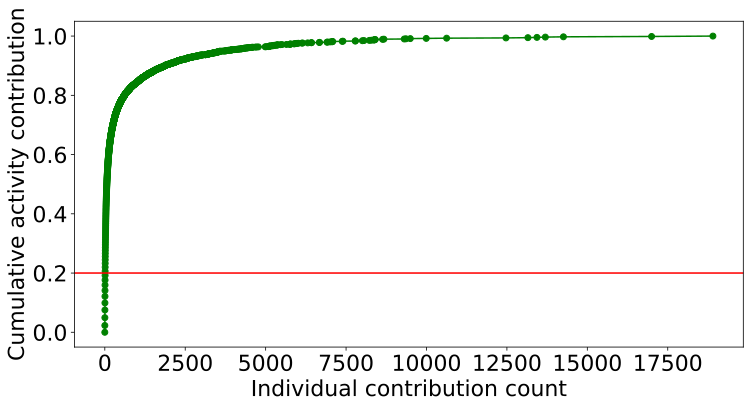

In [7]:
plt.plot(occurence_count_sum.index.tolist(), occurence_count_sum['cumsum']/occurence_count_sum.iloc[-1]['cumsum'], 'go-')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.xlabel('Individual contribution count')
plt.ylabel('Cumulative activity contribution');

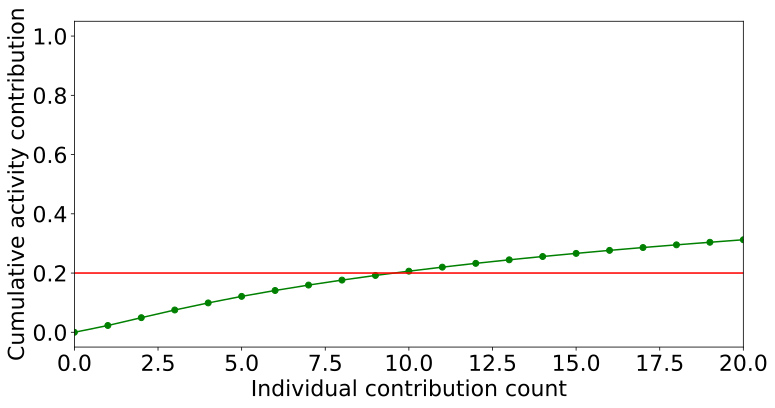

In [8]:
plt.plot(occurence_count_sum.index.tolist(), occurence_count_sum['cumsum']/occurence_count_sum.iloc[-1]['cumsum'], 'go-')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.xlim(0,20)
plt.xlabel('Individual contribution count')
plt.ylabel('Cumulative activity contribution');

### The above graph shows people who incurs more or equal to 10 activities in 2017 contribute to 80% of the whole activities. Now let's check what is the percentage of this population

In [9]:
occurence_count_sum.head()

,count,sum,cumsum
occurence,,,
0,1,0,0
1,334131,334131,334131
2,191621,383242,717373
3,125646,376938,1094311
4,86786,347144,1441455


In [10]:
np.sum(occurence_count_sum[10:]['count'])/np.sum(occurence_count_sum['count'])

0.20191681250068658

### So people who incurs more than 10 activities in 2017 contributed 80% of the content, but this population is only 20% of the contributor community. Another example for the 80/20 rule? :D

### We shall name this population as <span style="color:red">*ACTIVE CONTRIBUTORS*</span> and track their activity pattern.

## Check the distribution of maximum inter-activity durations for out active contributors population

In [8]:
with open('./data/processed/inter_activity_days.pkl', 'rb') as picklefile:
    inter_activity_days = pickle.load(picklefile)

In [9]:
inter_activity_days.shape

(1183423, 3)

In [10]:
inter_activity_days.head()

,id,count_diff,MAX_activity_interval
0,NaN,118376,0.083333
1,1491895.0,18903,4.500000
2,1144035.0,16997,1.583333
3,3832970.0,14256,2.291667
4,4909087.0,13694,33.541667


In [11]:
### Count the number of NA's
np.sum(inter_activity_days.isna())

id                            1
count_diff                    0
MAX_activity_interval    334131
dtype: int64

In [14]:
# Drop the NA's
inter_activity_days.dropna(axis=0, inplace=True)
inter_activity_days.id = inter_activity_days.id.astype(int)

# Narrow down to the active contributor population
active_contributor_inter = inter_activity_days[inter_activity_days['count_diff']>=9]

Text(0.5,1,'Distribution of maximum inter-activity days \n among ACTIVE CONTRIBUTORS')

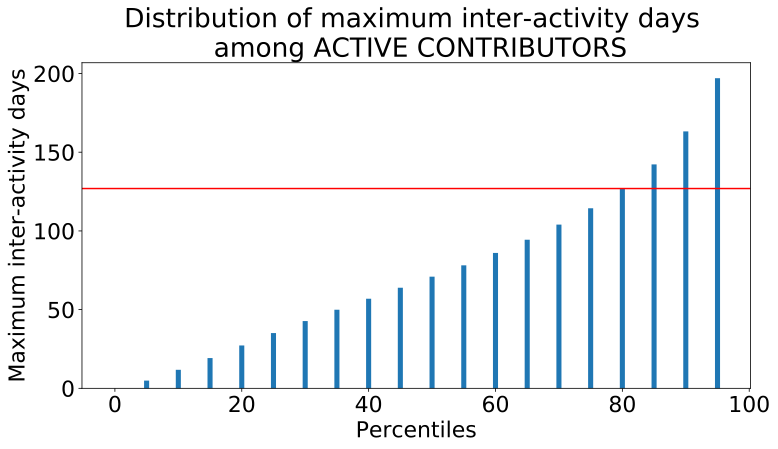

In [16]:
percentiles = np.arange(0,100,5)
percentile_values = []
for i in percentiles:
    percentile_values.append(np.percentile(active_contributor_inter.MAX_activity_interval,i))
plt.bar(percentiles, percentile_values)
plt.axhline(y=np.percentile(active_contributor_inter.MAX_activity_interval,80), color='r', linestyle='-')
plt.xlabel('Percentiles')
plt.ylabel('Maximum inter-activity days')
plt.title('Distribution of maximum inter-activity days \n among ACTIVE CONTRIBUTORS')

In [19]:
active_contributors_id = set(active_contributor_inter.id.sample(frac = .1, random_state=4444))
with open('./data/processed/active_contributors_id.pkl', 'wb') as picklefile:
    pickle.dump(active_contributors_id, picklefile)

### It seems for 80% of the active contributors, their maximum inter-activity days are less than 127 days. For convenience, we will define that people who does not incur any activity for more than <span style="color:red">3 months</span> are no longer part of the <span style="color:red">*ACTIVE CONTRIBUTORS*</span> population

In [20]:
with open('./data/processed/user_reputation.pkl', 'rb') as picklefile:
    user_reputation = pickle.load(picklefile)

In [21]:
print (user_reputation.shape)
user_reputation.head()

(8917507, 19)


,id,about_me_length,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,profile_image_url,website_url,answer_reputation_total_2017,question_reputation_total_2017,accepted_reputation_total_2017,answer_reputation_total_2018,question_reputation_total_2018,accepted_reputation_total_2018,reputation_2017,reputation_2018
0,7133451,0,,2016-11-08 19:21:25.933000+00:00,2018-05-30 19:00:38.917000+00:00,,26,5,0,https://www.gravatar.com/avatar/71c3b0645c16ad...,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,5498679,0,,2015-10-28 14:15:36.093000+00:00,2018-06-01 07:26:03.787000+00:00,,21,2,0,https://www.gravatar.com/avatar/1867f3486c0b6d...,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,5904377,0,,2016-02-09 16:50:46.517000+00:00,2018-05-31 14:22:47.877000+00:00,"Toronto, ON, Canada",6,0,0,https://i.stack.imgur.com/Apkfp.jpg,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,9170343,0,,2018-01-03 23:00:07.210000+00:00,2018-05-31 03:43:33.633000+00:00,,6,0,0,https://www.gravatar.com/avatar/a4fed561399f70...,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,9409758,0,,2018-02-25 17:35:51.137000+00:00,2018-03-02 15:46:32.927000+00:00,,6,0,0,https://lh6.googleusercontent.com/-xm3JM9lBCzw...,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


## Filter the user_reputation with id's in active contributor population
user_reputation.apply(lambda x:x if x[0] in active_contributors_id, axis = 1)
How to do this cleverly?

In [22]:
active_contributor_reputation = user_reputation[user_reputation['id'].isin(active_contributors_id)]

In [24]:
active_contributor_reputation.head()

,id,about_me_length,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,profile_image_url,website_url,answer_reputation_total_2017,question_reputation_total_2017,accepted_reputation_total_2017,answer_reputation_total_2018,question_reputation_total_2018,accepted_reputation_total_2018,reputation_2017,reputation_2018
538726,7100312,186,,2016-11-01 15:12:46.523000+00:00,2018-06-02 20:20:38.567000+00:00,Belarus,56,9,0,https://graph.facebook.com/1002158276596075/pi...,,NaN,NaN,NaN,0.0,NaN,15.0,0.0,15.0
539980,8515203,0,,2017-08-25 06:36:40.873000+00:00,2017-09-13 18:44:43.537000+00:00,"Seattle, WA, United States",24,0,0,https://www.gravatar.com/avatar/3be5f7466ee2fb...,,NaN,NaN,NaN,0.0,NaN,15.0,0.0,15.0
557811,461982,305,,2010-09-29 16:12:15.893000+00:00,2018-06-03 04:15:37.593000+00:00,"Paradise, CA",1537,64,34,,https://loungekatt.gitlab.io,1120.0,NaN,45.0,1280.0,NaN,45.0,1165.0,1325.0
557828,2720901,99,,2013-08-27 08:58:12.433000+00:00,2018-05-31 16:52:41.500000+00:00,Russia,1149,54,5,https://www.gravatar.com/avatar/d2dc8cb39d5823...,,720.0,NaN,300.0,770.0,NaN,375.0,1020.0,1145.0
560552,9036815,0,,2017-12-01 02:01:58.253000+00:00,2018-06-02 15:33:01.427000+00:00,"Fairfield, CT, United States",88,0,0,https://i.stack.imgur.com/bW2aI.jpg,,NaN,NaN,NaN,10.0,NaN,45.0,0.0,55.0


In [25]:
len(list(active_contributors_id))

23895

## How about only the answerers

In [34]:
with open('./data/processed/answer_count.pkl', 'rb') as picklefile:
    answer_count = pickle.load(picklefile)

In [36]:
answer_count.head()

,id,count
0,NaN,0
1,2019247.0,256
2,1090562.0,256
3,8066551.0,1
4,8080844.0,1


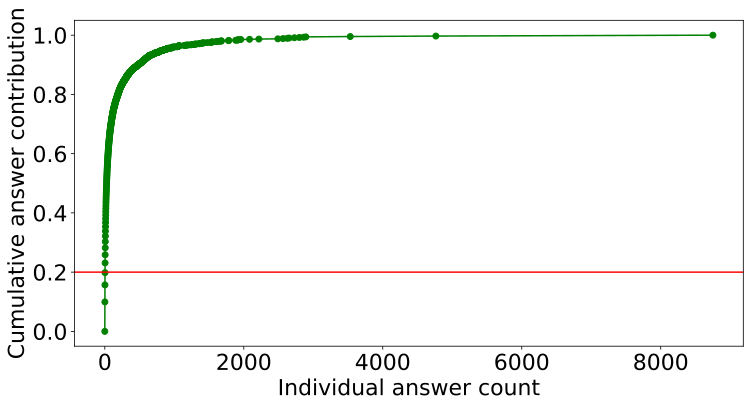

In [39]:
ansoc_count_sum = answer_count.groupby('count')['count'].agg(['count', 'sum'])
ansoc_count_sum['cumsum'] = np.cumsum(ansoc_count_sum['sum'])
plt.plot(ansoc_count_sum.index.tolist(), ansoc_count_sum['cumsum']/ansoc_count_sum.iloc[-1]['cumsum'], 'go-')
plt.axhline(y=0.2, color='r', linestyle='-')
plt.xlabel('Individual answer count')
plt.ylabel('Cumulative answer contribution');


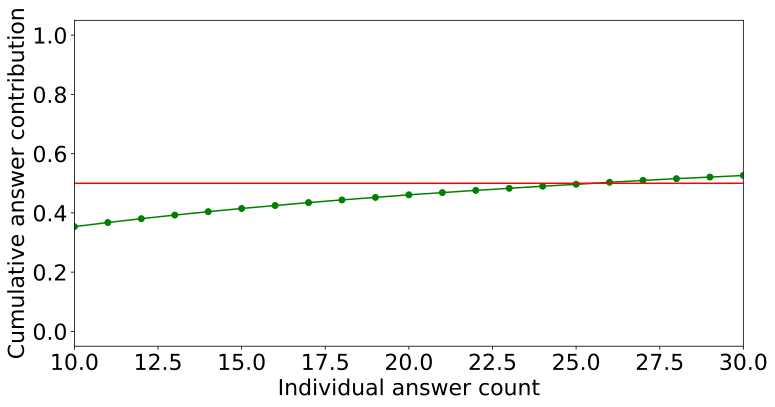

In [42]:
plt.plot(ansoc_count_sum.index.tolist(), ansoc_count_sum['cumsum']/ansoc_count_sum.iloc[-1]['cumsum'], 'go-')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlim(10,30)
plt.xlabel('Individual answer count')
plt.ylabel('Cumulative answer contribution');

In [43]:
np.sum(ansoc_count_sum[26:]['count'])/np.sum(ansoc_count_sum['count'])


0.03202309447315733

### So 3% of the answerers contribute to 50% of the answers on SO. These are people who wrote more than 26 questions in 2017 

In [46]:
with open('./data/processed/answer_time_series.pkl', 'rb') as picklefile:
    answer_time_series = pickle.load(picklefile)

In [54]:
answer_time_series.head()

,id,m_201701,m_201702,m_201703,m_201704,m_201705,m_201706,m_201707,m_201708,m_201709,m_201710,m_201711,m_201712
0,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,1,0,0,0,0,0,0,0,0,0
2,9.0,0,0,1,0,0,0,0,0,0,0,0,0
3,13.0,2,5,0,0,0,0,0,0,0,0,0,0
4,22.0,0,0,0,0,0,0,0,0,0,6,2,0


In [68]:
answer_time_series[answer_time_series.values[:, 1:].sum(axis=1) > 26]

,id,m_201701,m_201702,m_201703,m_201704,m_201705,m_201706,m_201707,m_201708,m_201709,m_201710,m_201711,m_201712
8,51.0,0,0,0,0,30,0,0,0,0,0,0,0
30,152.0,0,0,5,0,0,0,0,0,20,3,0,0
51,267.0,4,3,11,10,13,24,9,25,5,0,12,6
63,369.0,5,2,0,0,1,3,2,12,4,7,12,3
78,476.0,16,17,16,23,36,41,45,43,40,35,30,34
96,582.0,0,0,0,0,0,4,0,8,31,29,0,0
136,893.0,4,15,2,4,0,0,3,3,3,6,5,3
139,905.0,8,9,17,22,4,0,10,15,4,3,1,2
152,967.0,6,2,4,5,8,0,5,5,3,6,1,4
175,1114.0,0,1,1,0,17,11,2,2,0,0,0,1


In [ ]:
top_answer

## Load the time series

In [4]:
with open('./data/processed/activity_time_series.pkl', 'rb') as picklefile:
    activity_time_series = pickle.load(picklefile)

In [28]:
active_contributor_activity = activity_time_series[activity_time_series['id'].isin(active_contributors_id)]

In [29]:
active_contributor_activity

,id,m_201701,m_201702,m_201703,m_201704,m_201705,m_201706,m_201707,m_201708,m_201709,m_201710,m_201711,m_201712
16,51,0,0,0,0,39,0,0,1,0,0,0,0
41,112,3,3,1,3,2,0,3,0,1,2,0,3
71,216,0,2,0,15,1,0,0,0,0,0,0,0
131,404,0,0,0,3,0,0,0,4,6,7,0,2
179,609,3,0,0,1,0,0,0,2,1,0,2,1
219,775,3,0,2,6,0,0,0,0,0,1,0,0
232,834,33,1,2,0,0,0,0,0,0,3,0,0
262,959,0,3,2,2,1,0,1,3,0,3,0,0
325,1231,1,0,3,2,1,2,0,2,0,2,0,0
326,1237,1,1,0,0,0,0,1,3,3,0,0,2


In [28]:
active_contributor_activity['Active'] = active_contributor_activity.apply(lambda x:0 if np.sum(x[10:13])==0 else 1, axis=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
## Formalize the X and Y's
with open('./data/processed/activity_time_series_2018.pkl', 'rb') as picklefile:
    activity_time_series_2018 = pickle.load(picklefile)

In [34]:
activity_time_series_2018['Active'] = activity_time_series_2018.apply(lambda x:0 if np.sum(x[1:4])==0 else 1, axis=1)
ac_2018_id = set(activity_time_series_2018[activity_time_series_2018['Active']==1].id)
active_contributor_activity['Active_2018'] = active_contributor_activity.apply(lambda x:0 if x[0] in ac_2018_id else 1, axis=1)

In [48]:
active_contributor_activity.Active_2018.value_counts()

0    11972
1    11923
Name: Active_2018, dtype: int64

In [49]:
Y = active_contributor_activity.Active_2018

In [51]:
active_contributor_activity.drop('Active_2018', axis=1, inplace=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
X = pd.merge(active_contributor_reputation, active_contributor_activity, how='left', left_on='id', right_on='id' )

In [56]:
X.head()

,id,about_me_length,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,profile_image_url,...,m_201703,m_201704,m_201705,m_201706,m_201707,m_201708,m_201709,m_201710,m_201711,m_201712
0,7100312,186,,2016-11-01 15:12:46.523000+00:00,2018-06-02 20:20:38.567000+00:00,Belarus,56,9,0,https://graph.facebook.com/1002158276596075/pi...,...,0,0,0,0,0,0,0,0,0,0
1,8515203,0,,2017-08-25 06:36:40.873000+00:00,2017-09-13 18:44:43.537000+00:00,"Seattle, WA, United States",24,0,0,https://www.gravatar.com/avatar/3be5f7466ee2fb...,...,0,0,0,0,0,1,0,0,0,0
2,461982,305,,2010-09-29 16:12:15.893000+00:00,2018-06-03 04:15:37.593000+00:00,"Paradise, CA",1537,64,34,,...,0,1,1,1,1,0,0,0,1,0
3,2720901,99,,2013-08-27 08:58:12.433000+00:00,2018-05-31 16:52:41.500000+00:00,Russia,1149,54,5,https://www.gravatar.com/avatar/d2dc8cb39d5823...,...,0,1,1,1,0,0,0,0,1,0
4,9036815,0,,2017-12-01 02:01:58.253000+00:00,2018-06-02 15:33:01.427000+00:00,"Fairfield, CT, United States",88,0,0,https://i.stack.imgur.com/bW2aI.jpg,...,0,0,0,0,0,0,0,0,0,1


(23895,)